In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./assets/Life Expectancy Data.csv')

In [3]:
df.head(50)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [7]:
df.Status

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object

In [8]:
df.columns[3]

'Life expectancy '

In [9]:
df.sort_values(by='Life expectancy ', ascending=False, inplace=True)

In [10]:
df.head(100)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2433,Spain,2007,Developed,89.0,72.0,2,11.05,510.932701,96.0,267,...,96.0,8.36,96.0,0.1,3279.41400,4522683.0,0.6,0.5,0.849,16.0
1916,Norway,2009,Developed,89.0,67.0,0,6.68,142.374943,NaN,2,...,94.0,9.49,94.0,0.1,817.77681,4828726.0,0.7,0.7,0.936,17.4
938,France,2007,Developing,89.0,89.0,3,12.20,64.737149,42.0,39,...,99.0,1.45,98.0,0.1,416.58397,6416229.0,0.6,0.6,0.873,16.1
915,Finland,2014,Developing,89.0,78.0,0,8.80,6164.455402,NaN,0,...,98.0,9.68,98.0,0.1,49914.61864,5461512.0,0.9,0.8,0.890,17.0
2513,Sweden,2007,Developed,89.0,63.0,0,6.90,7593.391622,NaN,1,...,98.0,8.92,98.0,0.1,53324.37937,914892.0,1.3,1.3,0.895,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,Singapore,2013,Developed,82.7,57.0,0,1.83,714.344102,97.0,138,...,97.0,4.53,97.0,0.1,5629.18914,NaN,2.2,2.2,0.920,15.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.363050,91.0,340,...,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
1282,Italy,2015,Developed,82.7,56.0,1,NaN,0.000000,93.0,159,...,93.0,NaN,93.0,0.1,349.14755,673582.0,0.6,0.6,0.881,16.3
1321,Japan,2008,Developed,82.7,66.0,3,7.11,7313.175418,NaN,11015,...,98.0,8.60,98.0,0.1,39339.29757,12863.0,1.8,1.5,0.880,15.0


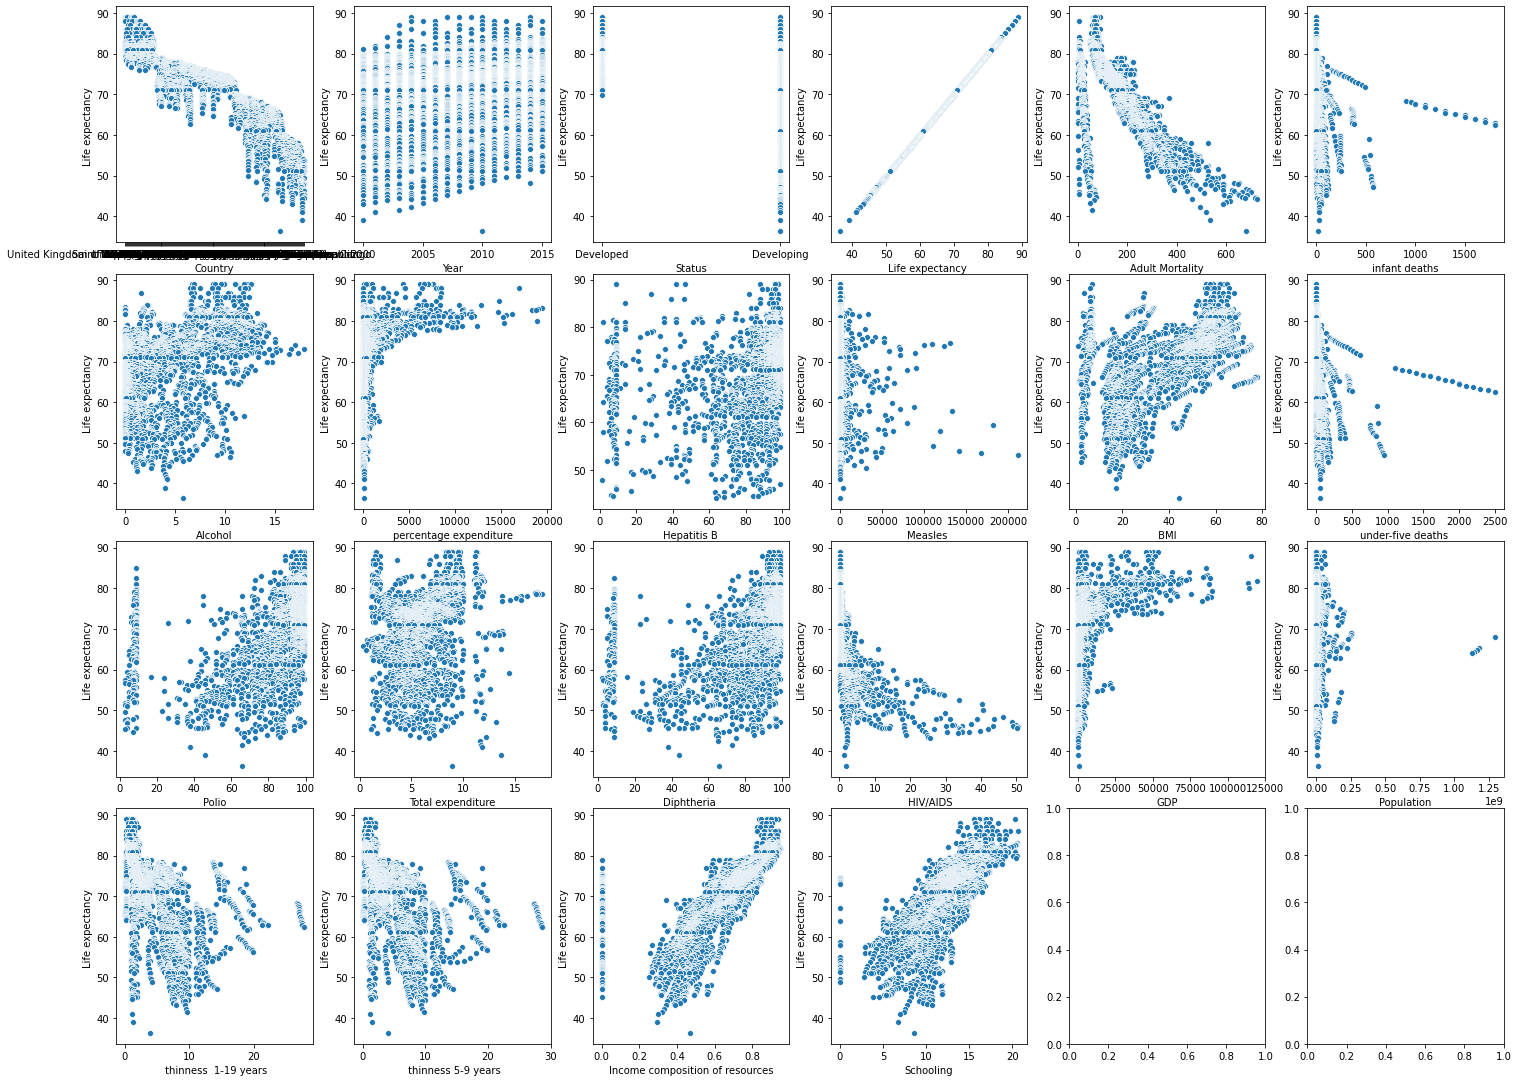

In [11]:
fig, axes= plt.subplots(nrows=4, ncols=6,figsize=(20,15))
plt.tight_layout()
column = 0
row = 0
for i, column_name in enumerate(df.columns):
    if i%6==0 and i!=0:
        row += 1
        column = 0
    sns.scatterplot(ax=axes[row,column], data=df, x=column_name, y='Life expectancy ')
    column += 1

In [12]:
# most correlation between Life exp and Schooling, Income comp and adult mortality

## BELGIUM

In [13]:
Belgium_df = df[df['Country'] == 'Belgium']

In [14]:
Belgium_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,...,99.0,1.59,99.0,0.1,47439.39684,112957.0,1.0,1.0,0.890,16.3
242,Belgium,2013,Developed,87.0,77.0,0,11.77,702.359357,98.0,39,...,99.0,1.57,99.0,0.1,4651.38647,11182817.0,1.0,0.9,0.889,16.3
243,Belgium,2012,Developed,83.0,78.0,0,10.08,664.473897,98.0,109,...,99.0,1.54,99.0,0.1,4474.57170,11128246.0,0.9,0.9,0.886,16.2
244,Belgium,2011,Developed,83.0,8.0,0,10.11,713.529735,97.0,576,...,98.0,1.42,98.0,0.1,4772.77415,1147744.0,0.9,0.9,0.884,16.1
240,Belgium,2015,Developed,81.1,74.0,0,NaN,0.000000,98.0,47,...,99.0,NaN,99.0,0.1,4356.87500,11274196.0,1.0,1.0,0.895,16.6
245,Belgium,2010,Developed,80.0,81.0,0,10.22,665.735612,97.0,40,...,98.0,1.17,98.0,0.1,4438.23741,1895586.0,0.9,0.9,0.878,15.9
246,Belgium,2009,Developed,79.8,85.0,0,10.05,671.937657,97.0,33,...,98.0,1.39,98.0,0.1,4488.56150,1796493.0,0.9,0.9,0.876,15.8
248,Belgium,2007,Developed,79.5,86.0,0,10.25,640.356092,94.0,64,...,99.0,9.25,98.0,0.1,4443.83131,16257.0,0.8,0.8,0.871,15.8
247,Belgium,2008,Developed,79.5,87.0,0,10.47,7191.051507,98.0,98,...,99.0,9.60,99.0,0.1,48424.58927,179973.0,0.8,0.8,0.874,15.8
249,Belgium,2006,Developed,79.4,85.0,0,10.98,5579.199083,94.0,15,...,99.0,9.17,98.0,0.1,38852.36130,1547958.0,0.8,0.8,0.865,15.7


Text(0.5, 0, 'years')

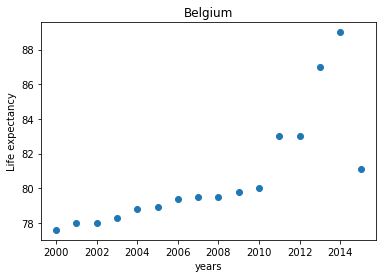

In [15]:
plt.scatter(Belgium_df.Year, Belgium_df['Life expectancy '])
plt.title('Belgium')
plt.ylabel('Life expectancy')
plt.xlabel('years')

In [16]:
X = Belgium_df.Year
y = Belgium_df['Life expectancy ']

In [17]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
y.shape

(16, 1)

In [18]:
regressor = LinearRegression()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
prediction = regressor.predict(X_train)

In [22]:
print(regressor.score(X_test, y_test))
print(regressor.score(X_train, y_train))

0.13743341190274383
0.746673979842926


Text(0.5, 0, 'years')

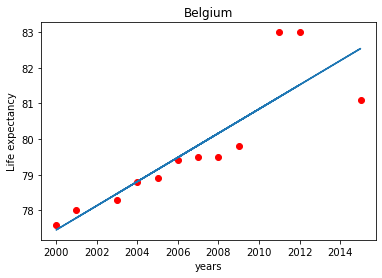

In [23]:
plt.scatter(X_train,y_train, color="red")
plt.plot(X_train, prediction)
# plt.plot(, prediction)
plt.title('Belgium')
plt.ylabel('Life expectancy')
plt.xlabel('years')

In [129]:
X_predict = [2100]  
y_predict = regressor.predict(X_predict)

ValueError: Expected 2D array, got 1D array instead:
array=[2100].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [130]:
## I'm having trouble extracting a predicted value uit of the regression...

## SPAIN (separate countries have to few datapoints imo. So decided to compare developed vs developing countries.)

In [ ]:
Spain_df = df[df['Country'] == 'Spain']

In [ ]:
Spain_df

In [ ]:
plt.scatter(Spain_df.Year, Spain_df['Life expectancy '])
plt.title('Spain')
plt.ylabel('Life expectancy')
plt.xlabel('years')

## Developed vs developing


In [25]:
Developed_df = df[df['Status'] == 'Developed']
Developing_df = df[df['Status'] == 'Developing']

In [26]:
Developed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 2433 to 1456
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          512 non-null    object 
 1   Year                             512 non-null    int64  
 2   Status                           512 non-null    object 
 3   Life expectancy                  512 non-null    float64
 4   Adult Mortality                  512 non-null    float64
 5   infant deaths                    512 non-null    int64  
 6   Alcohol                          484 non-null    float64
 7   percentage expenditure           512 non-null    float64
 8   Hepatitis B                      339 non-null    float64
 9   Measles                          512 non-null    int64  
 10   BMI                             512 non-null    float64
 11  under-five deaths                512 non-null    int64  
 12  Polio             

In [27]:
Developing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426 entries, 938 to 2713
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2426 non-null   object 
 1   Year                             2426 non-null   int64  
 2   Status                           2426 non-null   object 
 3   Life expectancy                  2416 non-null   float64
 4   Adult Mortality                  2416 non-null   float64
 5   infant deaths                    2426 non-null   int64  
 6   Alcohol                          2260 non-null   float64
 7   percentage expenditure           2426 non-null   float64
 8   Hepatitis B                      2046 non-null   float64
 9   Measles                          2426 non-null   int64  
 10   BMI                             2392 non-null   float64
 11  under-five deaths                2426 non-null   int64  
 12  Polio             

In [50]:
type(Developing_df['Life expectancy '])

pandas.core.series.Series

In [67]:
Developing_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            166
percentage expenditure               0
Hepatitis B                        380
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  194
Diphtheria                          19
 HIV/AIDS                            0
GDP                                384
Population                         556
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    119
Schooling                          115
dtype: int64

In [71]:
Developing_df = Developing_df.dropna()

In [72]:
Developing_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [73]:
X_dev = Developed_df.Year
y_dev = Developed_df['Life expectancy ']
X_ping = Developing_df.Year
y_ping = Developing_df['Life expectancy ']

In [74]:
type(y_ping)

pandas.core.series.Series

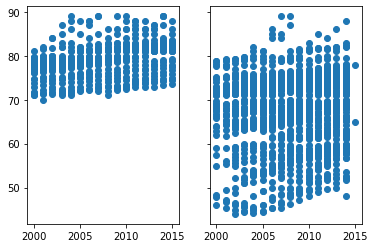

In [75]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X_dev, y_dev)
ax2.scatter(X_ping, y_ping)

In [91]:
# note that the life expectancy in developing countries already starts below 50 in some cases!!!

## Lin Reg of developed

In [76]:
X_dev = np.array(X_dev).reshape(-1,1)
y_dev = np.array(y_dev).reshape(-1,1)

In [77]:
reg_dev = LinearRegression()

In [78]:
X_dev_train, X_dev_test, y_dev_train, y_dev_test = train_test_split(X_dev, y_dev, test_size=0.20, random_state=42)

In [79]:
reg_dev.fit(X_dev_train, y_dev_train)

LinearRegression()

In [80]:
prediction_developed = reg_dev.predict(X_dev_train)

## Lin Reg of developing

In [81]:
X_ping = np.array(X_ping).reshape(-1,1)
y_ping = np.array(y_ping).reshape(-1,1)

In [82]:
type(y_ping)

numpy.ndarray

In [83]:
y_ping

array([[89. ],
       [89. ],
       [88. ],
       ...,
       [44.5],
       [44.3],
       [44. ]])

In [84]:
reg_ping = LinearRegression()

In [85]:
X_ping_train, X_ping_test, y_ping_train, y_ping_test = train_test_split(X_ping, y_ping, test_size=0.20, random_state=42)

In [86]:
reg_ping.fit(X_ping, y_ping)

LinearRegression()

In [113]:
prediction_developing = reg_ping.predict(X_ping_train)

## Plots showing regression line

Text(0.5, 15.0, 'years')

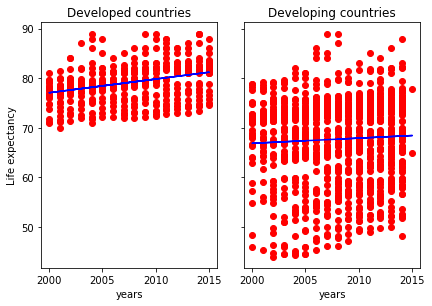

In [112]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

plt.tight_layout()

ax1.scatter(X_dev_train,y_dev_train, color="red")
ax1.plot(X_dev_train,prediction_developed, color="blue")
ax1.set_title('Developed countries')
ax1.set_xlabel('years')
ax1.set_ylabel('Life expectancy')


ax2.scatter(X_ping_train,y_ping_train, color='red')
ax2.plot(X_ping_train,prediction_developing, color='blue')
ax2.set_title('Developing countries')
ax2.set_xlabel('years')

